In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [8]:
def h_average(s,t,z=.025):                  # averaging kernel     
    return np.double(np.abs(s-t)<=z)/(2*z)

def h_hat(s,t,z=.025):                      # hat function kernel     
    return np.maximum(0,1-np.abs(s-t)/z)/z

def h_gaussian(s,t,z=.025):                 # Gaussian kernel     
    c = 1/(np.sqrt(np.pi)*z)
    return c*np.exp(-np.power(s-t,2)/(z**2))
                  
def build_blur_A_gaussian(n=100,z=.025):
    A = np.zeros((n,n));
    s = np.array([(j+.5)/n for j in range(n)])
    t = np.array([(k+.5)/n for k in range(n)])
    for j in range(0,n):
        A[j,:] = h_gaussian(s[j],t,z)/n
    return A

def build_blur_A_hat(n=100,z=.025):
    A = np.zeros((n,n));
    s = np.array([(j+.5)/n for j in range(n)])
    t = np.array([(k+.5)/n for k in range(n)])
    for j in range(0,n):
        A[j,:] = h_hat(s[j],t,z)/n
    return A

def build_blur_A_average(n=100,z=.025):
    A = np.zeros((n,n));
    s = np.array([(j+.5)/n for j in range(n)])
    t = np.array([(k+.5)/n for k in range(n)])
    for j in range(0,n):
        A[j,:] = h_average(s[j],t,z)/n
    return A

In [9]:
def f_function(t=0.5):
    f1 = (t>=0.15)*np.maximum(1-12*(t-.15),0);    # a down ramp
    f2 = np.abs(t-0.5)<=.1;                       # a step
    f3 = np.maximum(1-10*np.abs(t-0.825),0);      # a hat
    return f1+f2+f3 


The next block of code basically replicates the example from the Section 3 of the text.

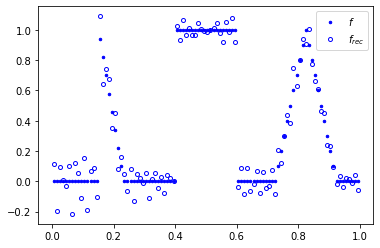

In [71]:
n = 100
z = 0.025;
eps = .001;

t = np.array([(k+.5)/n for k in range(n)])
A = build_blur_A_average(n,z);
f = f_function(t);

b = A@f;
e = eps*np.linalg.norm(b)*np.random.randn(n);
bnoise = b+e;

frec = np.linalg.solve(A,bnoise)
plt.plot(t,f,'.',color='blue',markersize=5,label='$f$')
plt.plot(t,frec,'.',markerfacecolor='none',color='blue',\
         markersize=8,label='$f_{rec}$')
plt.legend()

The next code block shows the first exercise in Section 3.

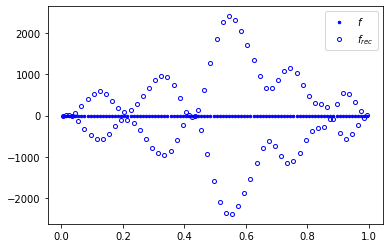

In [70]:
n = 100
z = 0.025;
eps = .001;

t = np.array([(k+.5)/n for k in range(n)])
A = build_blur_A_gaussian(n,z);
f = f_function(t);

b = A@f;
e = eps*np.linalg.norm(b)*np.random.randn(n);
bnoise = b+e;

frec = np.linalg.solve(A,bnoise)

plt.plot(t,f,'.',color='blue',markersize=5,label='$f$')
plt.plot(t,frec,'.',markerfacecolor='none',color='blue',markersize=8,label='$f_{rec}$')
plt.legend()

The next code blocks replicate the second exercise in Section 3.

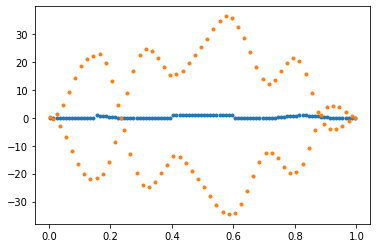

In [73]:
n = 100
z = 0.025;
eps = 1e-5;

t = np.array([(k+.5)/n for k in range(n)])
A = build_blur_A_gaussian(n,z);
f = f_function(t);

b = A@f;
e = eps*np.linalg.norm(b)*np.random.randn(n);
bnoise = b+e;

frec = np.linalg.solve(A,bnoise)
plt.plot(t,f,'.')
plt.plot(t,frec,'.')

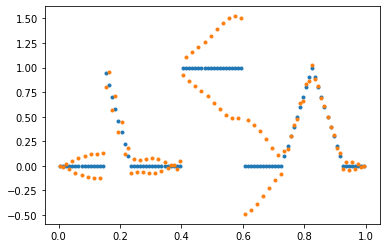

In [76]:
n = 100
z = 0.025;
eps = 1e-7;

t = np.array([(k+.5)/n for k in range(n)])
A = build_blur_A_gaussian(n,z);
f = f_function(t);

b = A@f;
e = eps*np.linalg.norm(b)*np.random.randn(n);
bnoise = b+e;

frec = np.linalg.solve(A,bnoise)
plt.plot(t,f,'.')
plt.plot(t,frec,'.')

The next code block addresses the third exercise in Section 3.

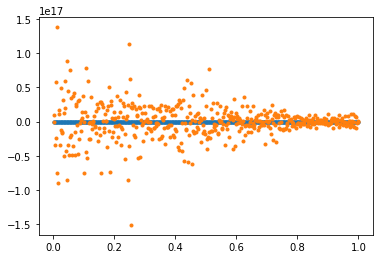

In [80]:
n = 500
z = 0.025;
eps = 1e-3;

t = np.array([(k+.5)/n for k in range(n)])
A = build_blur_A_gaussian(n,z);
f = f_function(t);

b = A@f;
e = eps*np.linalg.norm(b)*np.random.randn(n);
bnoise = b+e;

frec = np.linalg.solve(A,bnoise)
plt.plot(t,f,'.')
plt.plot(t,frec,'.')

In [74]:
np.maximum(np.array([2.0,-3,4]),0)

array([2., 0., 4.])

In [70]:
np.zeros(3)

array([0., 0., 0.])

In [1]:
import numpy as np
from scipy import linalg as la
import matplotlib.pyplot as plt

In [97]:
def h(s,t,z=.1):
    return np.double(np.abs(s-t)<=z)/(2*z)

def h(s,t,z=.1):
    return np.maximum(0,1-np.abs(s-t)/z)/z
                  
def build_blur_A(n=32,z=.1):
    A = np.zeros((n,n));
    s = np.array([(j-.5)/n for j in range(1,n+1)])
    t = np.array([(k-.5)/n for k in range(1,n+1)])
    for j in range(0,n):
        A[j,:] = h(s[j],t,z)/n
    return A

In [98]:
A = build_blur_A(8,.25)
print(A)

[[0.5  0.25 0.   0.   0.   0.   0.   0.  ]
 [0.25 0.5  0.25 0.   0.   0.   0.   0.  ]
 [0.   0.25 0.5  0.25 0.   0.   0.   0.  ]
 [0.   0.   0.25 0.5  0.25 0.   0.   0.  ]
 [0.   0.   0.   0.25 0.5  0.25 0.   0.  ]
 [0.   0.   0.   0.   0.25 0.5  0.25 0.  ]
 [0.   0.   0.   0.   0.   0.25 0.5  0.25]
 [0.   0.   0.   0.   0.   0.   0.25 0.5 ]]


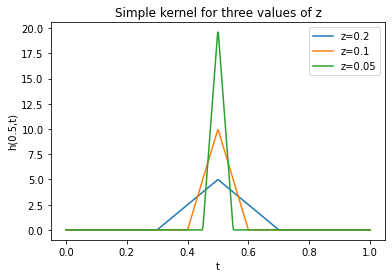

In [99]:
tt = np.linspace(0,1,500)
plt.figure()
for z in (0.2, 0.1, 0.05):
    plt.plot(tt,h(0.5,tt,z),'-')
plt.xlabel('t')
plt.ylabel('h(0.5,t)')
plt.title('Simple kernel for three values of z');
plt.legend(('z=0.2','z=0.1','z=0.05'))

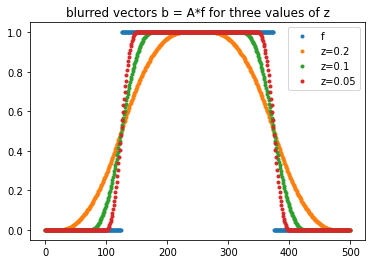

In [100]:
n = 500
s = np.array([(j-.5)/n for j in range(1,n+1)])

plt.figure()
plt.plot(f(s),'.')   
for z in (0.2, 0.1, 0.05):
    A = build_blur_A(n,z)
    b = A@f(s)
    plt.plot(b,'.')
#plt.xlabel('k')
#plt.ylabel('sigma_k')
plt.title('blurred vectors b = A*f for three values of z');
plt.legend(('f','z=0.2','z=0.1','z=0.05'))

Define the function $f$ (various degrees of smoothness)

In [101]:
def f(t):
    return np.double(np.abs(t-.5)<=.25)

def f1(t):
    return np.maximum(0,1-10*np.abs(t-.7))

def f2(t):
    return np.exp(-(100*(t-.6)**2))

Build the blurring matrix

In [102]:
n = 1000
A = build_blur_A(n,.1)

Blur the true function:  $b = A f$

In [103]:
t = np.array([(k-.5)/n for k in range(1,n+1)])
b = A@f(t);

Plot the true function $f$ and the blurred version $b$

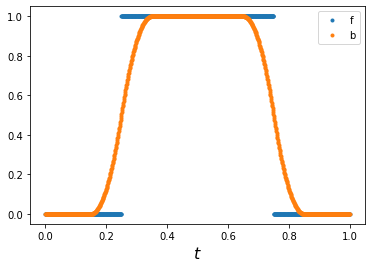

In [104]:
plt.plot(t,f(t),'.');
plt.plot(t,b,'.')
plt.xlabel('$t$',fontsize=16);
plt.legend(('f','b'))

Compute the Singular Value Decomposition of $A$ and plot the singular values

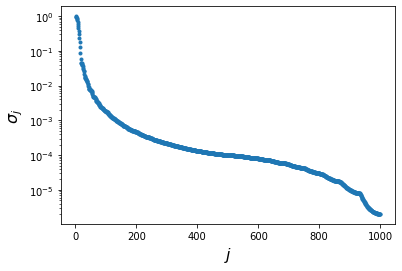

In [105]:
U,S,Vt = la.svd(A)
plt.semilogy(range(1,n+1),S,'.');
plt.xlabel('$j$',fontsize=16);
plt.ylabel('$\sigma_j$',fontsize=16);

Plot the coefficients $\gamma_j = u_j^T b$

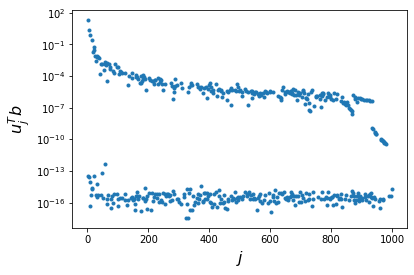

In [106]:
gamma = (U.T)@b
plt.semilogy(range(1,n+1),gamma,'.');
plt.xlabel('$j$',fontsize=16);
plt.ylabel('$u_j^Tb$',fontsize=16);

Plot the coefficients $(u_j^Tb)/\sigma_j$ that feature in the pseudoinverse solution $f_{\rm rec} = A^+ b$

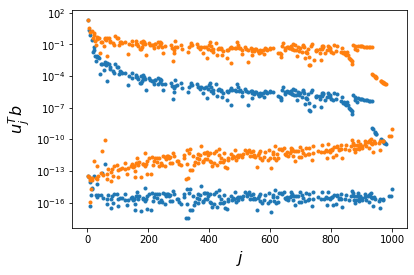

In [107]:
gamma = (U.T)@b;
plt.semilogy(range(1,n+1),gamma,'.');
plt.semilogy(range(1,n+1),gamma/S,'.');
plt.xlabel('$j$',fontsize=16);
plt.ylabel('$u_j^Tb$',fontsize=16);

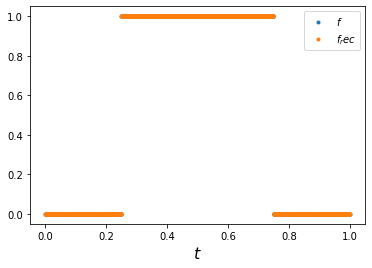

In [108]:
frec = la.solve(A,b);
plt.plot(t,f(t),'.');
plt.plot(t,frec,'.')
plt.xlabel('$t$',fontsize=16);
plt.legend(('$f$','$f_{rec}$'))

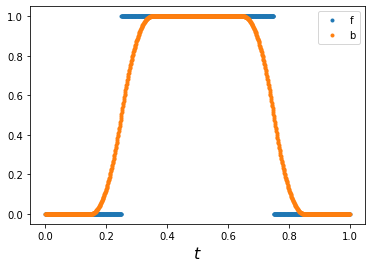

In [139]:
fvec = f(t)
b = A@((fvec+1e-3*np.random.randn(1,n)).T);
plt.plot(t,fvec,'.');
plt.plot(t,b,'.')
plt.xlabel('$t$',fontsize=16);
plt.legend(('f','b'));
plt.show();


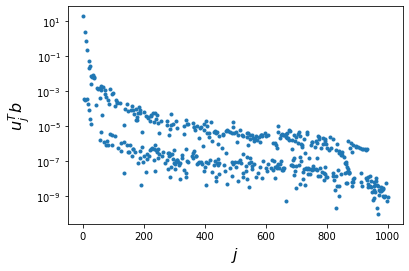

In [140]:
gamma = (U.T)@b
plt.semilogy(range(1,n+1),gamma,'.');
plt.xlabel('$j$',fontsize=16);
plt.ylabel('$u_j^Tb$',fontsize=16);

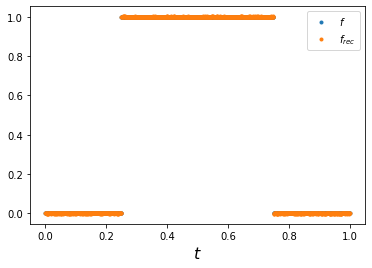

In [141]:
frec = la.solve(A,b);
plt.plot(t,f(t),'.');
plt.plot(t,frec,'.')
plt.xlabel('$t$',fontsize=16);
plt.legend(('$f$','$f_{rec}$'))

In [143]:
C = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(C)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [144]:
D = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(D)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [150]:
np.concatenate((C,D))

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9],
       [1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])